<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/02_EDA_Pressure_MentalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`DataPreprocessing`

In [143]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### load Data

In [144]:
data = pd.read_csv('/content/sample_data/df_final.csv')

In [145]:
# 결측값 확인
data.isnull().sum()

,0
id,0
name,0
gender,0
age,0
age_group,0
city,0
profession,0
cgpa,0
degree,0
work_study_pressure,0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51880 entries, 0 to 51879
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       51880 non-null  int64  
 1   name                     51880 non-null  object 
 2   gender                   51880 non-null  int64  
 3   age                      51880 non-null  float64
 4   age_group                51880 non-null  object 
 5   city                     51880 non-null  object 
 6   profession               51880 non-null  object 
 7   cgpa                     51880 non-null  float64
 8   degree                   51880 non-null  object 
 9   work_study_pressure      51880 non-null  float64
 10  work_study_satisfaction  51880 non-null  float64
 11  financial_stress         51880 non-null  float64
 12  sleep_duration           51880 non-null  object 
 13  dietary_habits           51880 non-null  object 
 14  work_study_hours      

In [147]:
data['gender'].value_counts()

,count
gender,
0,29425
1,22455


In [148]:
data['age_group'].value_counts()

,count
age_group,
46-55,14140
36-45,12243
26-35,9393
18-25,9082
56-65,7022


In [149]:
data['urban_rural'].value_counts()

,count
urban_rural,
urban,26808
rural,25072


## 데이터 탐색하기

In [150]:
data.columns

Index(['id', 'name', 'gender', 'age', 'age_group', 'city', 'profession',
       'cgpa', 'degree', 'work_study_pressure', 'work_study_satisfaction',
       'financial_stress', 'sleep_duration', 'dietary_habits',
       'work_study_hours', 'family_mh_history', 'suicidal_thoughts',
       'depression', 'urban_rural'],
      dtype='object')

In [151]:
data.describe()

,id,gender,age,cgpa,work_study_pressure,work_study_satisfaction,financial_stress,work_study_hours,family_mh_history,suicidal_thoughts,depression
count,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000
mean,70408.881515,0.432826,40.373439,1.518318,3.048265,2.980127,3.000702,6.272899,0.499480,0.494256,0.184426
std,40628.649482,0.495472,12.438310,3.139421,1.395562,1.398014,1.415004,3.836287,0.500005,0.499972,0.387835
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35221.750000,0.000000,29.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,70597.000000,0.000000,42.000000,0.000000,3.000000,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000
75%,105737.250000,1.000000,51.000000,0.000000,4.000000,4.000000,4.000000,10.000000,1.000000,1.000000,0.000000
max,140698.000000,1.000000,60.000000,10.000000,5.000000,5.000000,5.000000,12.000000,1.000000,1.000000,1.000000


In [152]:
data.groupby('urban_rural')['city'].value_counts()

urban_rural  city     
rural        Meerut       5522
             Rajkot       5204
             Srinagar     5065
             Agra         4681
             Varanasi     4600
urban        Ahmedabad    5605
             Mumbai       4964
             Hyderabad    4491
             Bangalore    4119
             Chennai      4041
             Delhi        3588
Name: count, dtype: int64

In [153]:
data.urban_rural.value_counts()

,count
urban_rural,
urban,26808
rural,25072


### 스트레스 비교 - urban_rural 그룹별 work_study_pressure, financial_stress 비교

- 지역별 스트레스 특성 : 평균 및 분포 비교      
- 스트레스 검정 (동일성)

In [154]:
# 스트레스  지표는 다르게 나오는 것이 좋음
target_variables = ['work_study_pressure', 'financial_stress']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 46.7992
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'work_study_pressure'의 분포는 다름

카이제곱 통계량: 29.0994
p-value: 0.0001
'rural' 그룹과 'urban' 그룹에서 'financial_stress'의 분포는 다름


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

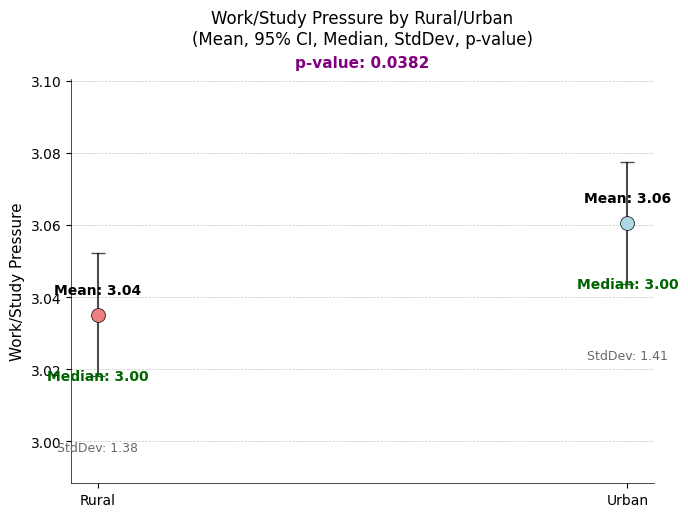

In [156]:
# 데이터 전처리: 필요한 컬럼에 대해 숫자형으로 변환하고 결측치 처리
# target_variable 과 group_column 에 해당하는 컬럼을 명시적으로 처리합니다.
target_variable = 'work_study_pressure'
group_column = 'urban_rural'

if target_variable not in df.columns:
    print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    raise SystemExit(f"Target variable '{target_variable}' missing.")
if group_column not in df.columns:
    print(f"Error: Grouping column '{group_column}' not found in DataFrame.")
    raise SystemExit(f"Grouping column '{group_column}' missing.")

df[target_variable] = pd.to_numeric(df[target_variable], errors='coerce')
df_cleaned = df.dropna(subset=[target_variable, group_column])

if df_cleaned.empty or len(df_cleaned[group_column].unique()) < 2:
    print(f"Not enough data or groups for variable '{target_variable}' after cleaning.")
    raise SystemExit("Insufficient data for analysis.")


# 1. 통계값 계산
grouped = df_cleaned.groupby('urban_rural')['work_study_pressure']
means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 2. 신뢰구간 (95%)
conf_intervals = {}
for group in means.index:
    if counts[group] > 1: # SEM 계산을 위해 최소 2개의 샘플 필요
        se = sem(df_cleaned[df_cleaned['urban_rural'] == group]['work_study_pressure'])
        ci_margin = t.ppf(0.975, df=counts[group] - 1) * se
        conf_intervals[group] = (means[group] - ci_margin, means[group] + ci_margin)
    else: # 데이터 포인트가 하나이거나 없는 경우 CI를 평균값으로 설정 (오차 없음)
        conf_intervals[group] = (means[group], means[group])


# 3. t-test
# 'rural'과 'urban' 그룹의 'work_study_pressure' 데이터 추출
rural_vals = df_cleaned[df_cleaned['urban_rural'] == 'rural']['work_study_pressure'].dropna()
urban_vals = df_cleaned[df_cleaned['urban_rural'] == 'urban']['work_study_pressure'].dropna()

p_value_text = "p-value: N/A"
if len(rural_vals) > 1 and len(urban_vals) > 1: # t-test는 각 그룹에 최소 2개의 샘플 필요
    t_stat, p_value = ttest_ind(rural_vals, urban_vals, equal_var=False, nan_policy='omit') # Welch's t-test
    p_value_text = f"p-value: {p_value:.4f}"
else:
    print("Warning: Insufficient data for t-test (each group needs >1 sample).")


# 4. 시각화
fig, ax = plt.subplots(figsize=(7, 6)) # 그래프 크기 조정

# 설정: rural 먼저
x_labels = ['rural', 'urban']
x_pos = np.arange(len(x_labels)) # x 위치를 숫자로 (0, 1)
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}
# horizontal_offset 제거 (사용자 원본 코드 스타일에서는 사용하지 않음)

# Y축 범위 계산을 위한 값 저장
plot_y_values = []

for i, group in enumerate(x_labels):
    plot_x = x_pos[i] # 오프셋 없이 원래 x 위치 사용

    mean = means[group]
    ci_lower, ci_upper = conf_intervals[group]
    # yerr는 (아래쪽 오차, 위쪽 오차) 또는 단일 값(대칭)으로 전달 가능
    # 여기서는 대칭적인 CI를 가정하고 절반을 사용
    ci_error_bar_value = (ci_upper - ci_lower) / 2

    std = stds[group]
    median = medians[group]

    # plot_y_values에 텍스트 위치도 고려하여 추가
    plot_y_values.extend([mean - ci_error_bar_value, mean + ci_error_bar_value, median, mean + 0.005, mean - 0.035])


    # 평균 마커 및 신뢰구간 error bar (사용자 제공 코드 스타일과 유사하게)
    # errorbar는 오차 막대만 그리고, 평균 마커는 별도로 그림
    ax.errorbar(plot_x, mean, yerr=ci_error_bar_value, fmt='o', color='black', capsize=5, elinewidth=1.5, markersize=0, zorder=2, alpha=0.7) # 마커 크기 0으로 설정
    ax.plot(plot_x, mean, 'o', markersize=10, color=colors[group], zorder=3, mec='black', mew=0.5) # 평균 지점에 색상 있는 마커

    # 텍스트: 평균, 중앙값, 표준편차 (사용자 제공 코드의 오프셋 스타일 참고)
    ax.text(plot_x, mean + 0.005, f"Mean: {mean:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    ax.text(plot_x, mean - 0.015, f"Median: {median:.2f}", ha='center', va='top', fontsize=10, color='darkgreen', fontweight='bold')
    ax.text(plot_x, mean - 0.035, f"StdDev: {std:.2f}", ha='center', va='top', fontsize=9, color='dimgray')

# Y축 범위 자동 조정을 위한 로직 (텍스트가 잘 보이도록)
if plot_y_values:
    min_y_plot = min(plot_y_values)
    max_y_plot = max(plot_y_values)
    y_padding_factor = 0.15
    y_range = max_y_plot - min_y_plot
    if y_range == 0: y_range = 0.1

    # p-value 텍스트를 위한 추가 상단 여백 확보
    ax.set_ylim(min_y_plot - y_range * y_padding_factor, max_y_plot + y_range * (y_padding_factor + 0.15))
else:
    # 데이터가 없을 경우의 기본 Y축 범위 (실제로는 이전 단계에서 에러 처리됨)
    if not means.empty:
        ax.set_ylim(means.min() - 0.1, means.max() + 0.1)
    else:
        ax.set_ylim(0,1)


# 5. p-value 그래프 상단 중앙에 표기
# ax.text의 y 좌표는 데이터 좌표계를 사용하므로, max(means) 또는 계산된 max_y_plot을 기준으로 설정
# 사용자가 제공한 코드의 p-value 위치 스타일 참고
# p_value_y_pos = max(means.values) + 0.03 if not means.empty else 0.5 # means가 비어있지 않을 때만 max 사용
# ax.text(0.5, p_value_y_pos, p_value_text, ha='center', va='bottom', fontsize=11, color='purple', fontweight='bold')
# transform=ax.transAxes를 사용하여 상대 좌표로 변경하는 것이 더 안정적일 수 있음
ax.text(0.5, 1.02, p_value_text, ha='center', va='bottom', transform=ax.transAxes, fontsize=11, color='purple', fontweight='bold')


# 6. 그래프 설정
ax.set_xticks(x_pos)
ax.set_xticklabels([label.capitalize() for label in x_labels], fontsize=10)
ax.set_ylabel("Work/Study Pressure", fontsize=11)
ax.set_title("Work/Study Pressure by Rural/Urban\n(Mean, 95% CI, Median, StdDev, p-value)", fontsize=12, pad=25) # pad로 p-value 공간 확보

# 배경 격자 추가 (Y축만)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# 불필요한 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout(rect=[0, 0.05, 1, 0.93]) # 여백 조정
plt.show()


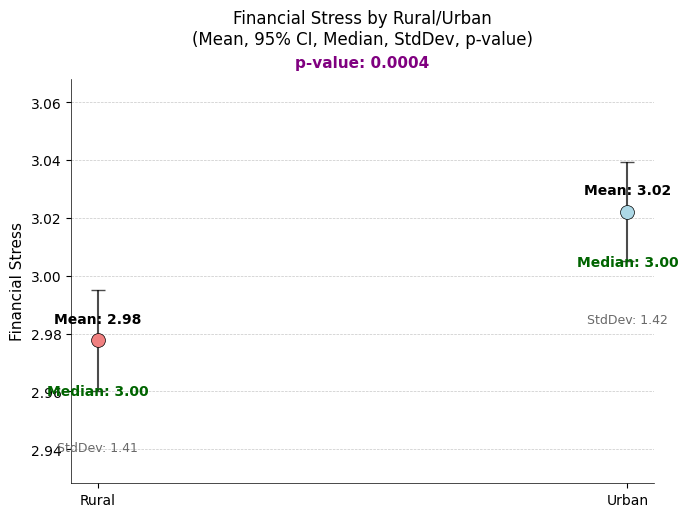

In [157]:
# 데이터 전처리: 필요한 컬럼에 대해 숫자형으로 변환하고 결측치 처리
# target_variable 과 group_column 에 해당하는 컬럼을 명시적으로 처리합니다.
target_variable = 'financial_stress'
group_column = 'urban_rural'

if target_variable not in df.columns:
    print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    raise SystemExit(f"Target variable '{target_variable}' missing.")
if group_column not in df.columns:
    print(f"Error: Grouping column '{group_column}' not found in DataFrame.")
    raise SystemExit(f"Grouping column '{group_column}' missing.")

df[target_variable] = pd.to_numeric(df[target_variable], errors='coerce')
df_cleaned = df.dropna(subset=[target_variable, group_column])

if df_cleaned.empty or len(df_cleaned[group_column].unique()) < 2:
    print(f"Not enough data or groups for variable '{target_variable}' after cleaning.")
    raise SystemExit("Insufficient data for analysis.")


# 1. 통계값 계산
grouped = df_cleaned.groupby('urban_rural')['financial_stress']
means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 2. 신뢰구간 (95%)
conf_intervals = {}
for group in means.index:
    if counts[group] > 1: # SEM 계산을 위해 최소 2개의 샘플 필요
        se = sem(df_cleaned[df_cleaned['urban_rural'] == group]['financial_stress'])
        ci_margin = t.ppf(0.975, df=counts[group] - 1) * se
        conf_intervals[group] = (means[group] - ci_margin, means[group] + ci_margin)
    else: # 데이터 포인트가 하나이거나 없는 경우 CI를 평균값으로 설정 (오차 없음)
        conf_intervals[group] = (means[group], means[group])


# 3. t-test
# 'rural'과 'urban' 그룹의 'work_study_pressure' 데이터 추출
rural_vals = df_cleaned[df_cleaned['urban_rural'] == 'rural']['financial_stress'].dropna()
urban_vals = df_cleaned[df_cleaned['urban_rural'] == 'urban']['financial_stress'].dropna()

p_value_text = "p-value: N/A"
if len(rural_vals) > 1 and len(urban_vals) > 1: # t-test는 각 그룹에 최소 2개의 샘플 필요
    t_stat, p_value = ttest_ind(rural_vals, urban_vals, equal_var=False, nan_policy='omit') # Welch's t-test
    p_value_text = f"p-value: {p_value:.4f}"
else:
    print("Warning: Insufficient data for t-test (each group needs >1 sample).")


# 4. 시각화
fig, ax = plt.subplots(figsize=(7, 6)) # 그래프 크기 조정

# 설정: rural 먼저
x_labels = ['rural', 'urban']
x_pos = np.arange(len(x_labels)) # x 위치를 숫자로 (0, 1)
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}
# horizontal_offset 제거 (사용자 원본 코드 스타일에서는 사용하지 않음)

# Y축 범위 계산을 위한 값 저장
plot_y_values = []

for i, group in enumerate(x_labels):
    plot_x = x_pos[i] # 오프셋 없이 원래 x 위치 사용

    mean = means[group]
    ci_lower, ci_upper = conf_intervals[group]
    # yerr는 (아래쪽 오차, 위쪽 오차) 또는 단일 값(대칭)으로 전달 가능
    # 여기서는 대칭적인 CI를 가정하고 절반을 사용
    ci_error_bar_value = (ci_upper - ci_lower) / 2

    std = stds[group]
    median = medians[group]

    # plot_y_values에 텍스트 위치도 고려하여 추가
    plot_y_values.extend([mean - ci_error_bar_value, mean + ci_error_bar_value, median, mean + 0.005, mean - 0.035])


    # 평균 마커 및 신뢰구간 error bar (사용자 제공 코드 스타일과 유사하게)
    # errorbar는 오차 막대만 그리고, 평균 마커는 별도로 그림
    ax.errorbar(plot_x, mean, yerr=ci_error_bar_value, fmt='o', color='black', capsize=5, elinewidth=1.5, markersize=0, zorder=2, alpha=0.7) # 마커 크기 0으로 설정
    ax.plot(plot_x, mean, 'o', markersize=10, color=colors[group], zorder=3, mec='black', mew=0.5) # 평균 지점에 색상 있는 마커

    # 텍스트: 평균, 중앙값, 표준편차 (사용자 제공 코드의 오프셋 스타일 참고)
    ax.text(plot_x, mean + 0.005, f"Mean: {mean:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    ax.text(plot_x, mean - 0.015, f"Median: {median:.2f}", ha='center', va='top', fontsize=10, color='darkgreen', fontweight='bold')
    ax.text(plot_x, mean - 0.035, f"StdDev: {std:.2f}", ha='center', va='top', fontsize=9, color='dimgray')

# Y축 범위 자동 조정을 위한 로직 (텍스트가 잘 보이도록)
if plot_y_values:
    min_y_plot = min(plot_y_values)
    max_y_plot = max(plot_y_values)
    y_padding_factor = 0.15
    y_range = max_y_plot - min_y_plot
    if y_range == 0: y_range = 0.1

    # p-value 텍스트를 위한 추가 상단 여백 확보
    ax.set_ylim(min_y_plot - y_range * y_padding_factor, max_y_plot + y_range * (y_padding_factor + 0.15))
else:
    # 데이터가 없을 경우의 기본 Y축 범위 (실제로는 이전 단계에서 에러 처리됨)
    if not means.empty:
        ax.set_ylim(means.min() - 0.1, means.max() + 0.1)
    else:
        ax.set_ylim(0,1)


# 5. p-value 그래프 상단 중앙에 표기
# ax.text의 y 좌표는 데이터 좌표계를 사용하므로, max(means) 또는 계산된 max_y_plot을 기준으로 설정
# 사용자가 제공한 코드의 p-value 위치 스타일 참고
# p_value_y_pos = max(means.values) + 0.03 if not means.empty else 0.5 # means가 비어있지 않을 때만 max 사용
# ax.text(0.5, p_value_y_pos, p_value_text, ha='center', va='bottom', fontsize=11, color='purple', fontweight='bold')
# transform=ax.transAxes를 사용하여 상대 좌표로 변경하는 것이 더 안정적일 수 있음
ax.text(0.5, 1.02, p_value_text, ha='center', va='bottom', transform=ax.transAxes, fontsize=11, color='purple', fontweight='bold')


# 6. 그래프 설정
ax.set_xticks(x_pos)
ax.set_xticklabels([label.capitalize() for label in x_labels], fontsize=10)
ax.set_ylabel("Financial Stress", fontsize=11)
ax.set_title("Financial Stress by Rural/Urban\n(Mean, 95% CI, Median, StdDev, p-value)", fontsize=12, pad=25) # pad로 p-value 공간 확보

# 배경 격자 추가 (Y축만)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

# 불필요한 테두리 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout(rect=[0, 0.05, 1, 0.93]) # 여백 조정
plt.show()


### 정신건강지표 비교 - urban_rural 그룹별 , satisfaction, suidial_thoughts, depression
- 정신건강지표 특성 : 발생률(비율)비교, study_work_satisfaction의 평균 및 분포를 비교 (범주형 vs 범주형 : stacked bar chart)          
- 정신건강 검정(동일성)

In [158]:
# 정신건강 지표는 다르게 나오는 것이 좋음 - 가설은 도시가 더 좋을 것이다.

target_variables = ['work_study_satisfaction','suicidal_thoughts', 'depression']

for var in target_variables:
    chi2_test(df, 'urban_rural', var)


카이제곱 통계량: 67.4551
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'work_study_satisfaction'의 분포는 다름

카이제곱 통계량: 4.3372
p-value: 0.0373
'rural' 그룹과 'urban' 그룹에서 'suicidal_thoughts'의 분포는 다름

카이제곱 통계량: 65.1902
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'depression'의 분포는 다름


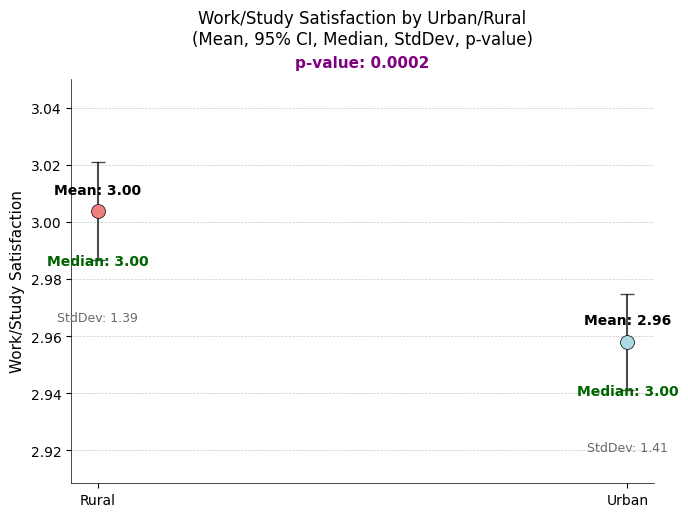

In [159]:
# 데이터 전처리: 필요한 컬럼에 대해 숫자형으로 변환하고 결측치 처리
# target_variable 과 group_column 에 해당하는 컬럼을 명시적으로 처리합니다.
target_variable = 'work_study_satisfaction'
group_column = 'urban_rural'

if target_variable not in df.columns:
    print(f"Error: Target variable '{target_variable}' not found in DataFrame.")
    raise SystemExit(f"Target variable '{target_variable}' missing.")
if group_column not in df.columns:
    print(f"Error: Grouping column '{group_column}' not found in DataFrame.")
    raise SystemExit(f"Grouping column '{group_column}' missing.")

df[target_variable] = pd.to_numeric(df[target_variable], errors='coerce')
df_cleaned = df.dropna(subset=[target_variable, group_column])

if df_cleaned.empty or len(df_cleaned[group_column].unique()) < 2:
    print(f"Not enough data or groups for variable '{target_variable}' after cleaning.")
    raise SystemExit("Insufficient data for analysis.")


# 1. 통계값 계산
grouped = df_cleaned.groupby('urban_rural')[target_variable] # 변경된 목표 변수 사용
means = grouped.mean()
stds = grouped.std()
medians = grouped.median()
counts = grouped.count()

# 'rural' 또는 'urban' 그룹이 없는 경우 에러 처리
if 'rural' not in means.index or 'urban' not in means.index:
    print("Error: 'rural' or 'urban' group is missing in the data after grouping.")
    raise SystemExit("Missing one or both groups for analysis.")

# 2. 신뢰구간 (95%)
conf_intervals = {}
for group in means.index:
    if counts[group] > 1: # SEM 계산을 위해 최소 2개의 샘플 필요
        se = sem(df_cleaned[df_cleaned['urban_rural'] == group][target_variable])
        ci_margin = t.ppf(0.975, df=counts[group] - 1) * se
        conf_intervals[group] = (means[group] - ci_margin, means[group] + ci_margin)
    else: # 데이터 포인트가 하나이거나 없는 경우 CI를 평균값으로 설정 (오차 없음)
        conf_intervals[group] = (means[group], means[group])


# 3. t-test
# 'rural'과 'urban' 그룹의 'work_study_satisfaction' 데이터 추출
rural_vals = df_cleaned[df_cleaned['urban_rural'] == 'rural'][target_variable].dropna()
urban_vals = df_cleaned[df_cleaned['urban_rural'] == 'urban'][target_variable].dropna()

p_value_text = "p-value: N/A"
if len(rural_vals) > 1 and len(urban_vals) > 1: # t-test는 각 그룹에 최소 2개의 샘플 필요
    t_stat, p_value = ttest_ind(rural_vals, urban_vals, equal_var=False, nan_policy='omit') # Welch's t-test
    p_value_text = f"p-value: {p_value:.4f}"
else:
    print("Warning: Insufficient data for t-test (each group needs >1 sample).")


# 4. 시각화
fig, ax = plt.subplots(figsize=(7, 6)) # 그래프 크기 조정 (사용자 코드와 유사하게)

# 설정: rural 먼저
x_labels = ['rural', 'urban']
x_pos = np.arange(len(x_labels)) # x 위치를 숫자로 (0, 1)
colors = {'rural': 'lightcoral', 'urban': 'lightblue'}

# Y축 범위 계산을 위한 값 저장
plot_y_values = []

for i, group in enumerate(x_labels):
    plot_x = x_pos[i] # 오프셋 없이 원래 x 위치 사용

    mean = means[group]
    ci_lower, ci_upper = conf_intervals[group]
    ci_error_bar_value = (ci_upper - ci_lower) / 2

    std = stds[group]
    median = medians[group]

    plot_y_values.extend([mean - ci_error_bar_value, mean + ci_error_bar_value, median, mean + 0.005, mean - 0.035])

    ax.errorbar(plot_x, mean, yerr=ci_error_bar_value, fmt='o', color='black', capsize=5, elinewidth=1.5, markersize=0, zorder=2, alpha=0.7)
    ax.plot(plot_x, mean, 'o', markersize=10, color=colors[group], zorder=3, mec='black', mew=0.5)

    ax.text(plot_x, mean + 0.005, f"Mean: {mean:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    ax.text(plot_x, mean - 0.015, f"Median: {median:.2f}", ha='center', va='top', fontsize=10, color='darkgreen', fontweight='bold')
    ax.text(plot_x, mean - 0.035, f"StdDev: {std:.2f}", ha='center', va='top', fontsize=9, color='dimgray')

if plot_y_values:
    min_y_plot = min(plot_y_values)
    max_y_plot = max(plot_y_values)
    y_padding_factor = 0.15
    y_range = max_y_plot - min_y_plot
    if y_range == 0: y_range = 0.1

    ax.set_ylim(min_y_plot - y_range * y_padding_factor, max_y_plot + y_range * (y_padding_factor + 0.15))
else:
    if not means.empty:
        ax.set_ylim(means.min() - 0.1, means.max() + 0.1)
    else:
        ax.set_ylim(0,1)

ax.text(0.5, 1.02, p_value_text, ha='center', va='bottom', transform=ax.transAxes, fontsize=11, color='purple', fontweight='bold')

# 6. 그래프 설정
ax.set_xticks(x_pos)
ax.set_xticklabels([label.capitalize() for label in x_labels], fontsize=10)
ax.set_ylabel("Work/Study Satisfaction", fontsize=11) # Y축 레이블 변경
ax.set_title("Work/Study Satisfaction by Urban/Rural\n(Mean, 95% CI, Median, StdDev, p-value)", fontsize=12, pad=25) # 제목 변경

ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
ax.xaxis.grid(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()


Using groups for plotting: ['rural', 'urban']


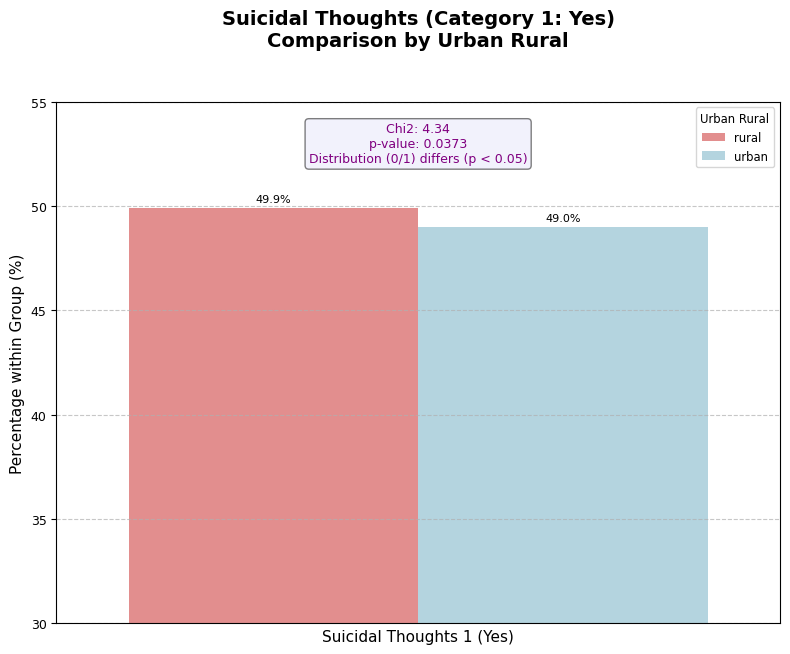

In [161]:
from scipy.stats import chi2_contingency

target_variables_analysis = ['suicidal_thoughts']
group_column = 'urban_rural' # Grouping column

# Check if grouping column exists
if group_column not in df.columns:
    print(f"Error: Grouping column '{group_column}' not found in DataFrame. Please check the column name.")
    raise SystemExit # Stop execution if grouping column is missing

# Define plot order for 'rural_urban for consistency
plot_order = ['rural', 'urban'] # rural first, then urban for plotting
palette_colors = {'rural': 'lightcoral', 'urban': 'lightblue'} # Colors

present_groups = df[group_column].unique()
# Ensure plot_order only contains groups actually present in the data, maintaining specified order
actual_plot_order = [g for g in plot_order if g in present_groups]
if len(actual_plot_order) < len(plot_order):
     print(f"Warning: Not all specified groups ({plot_order}) are present in the '{group_column}' column.")
     if not actual_plot_order: # If none of the specified order groups are present, use all unique groups
        actual_plot_order = list(present_groups)
plot_order = actual_plot_order
if not plot_order:
    print(f"Error: No valid groups found for '{group_column}' based on plot_order or unique values. Stopping.")
    raise SystemExit("No valid groups for plotting.")
print(f"Using groups for plotting: {plot_order}")


# Visualization - Loop through each target variable and create a separate plot
for var in target_variables_analysis: # This loop will run once for 'suicidal_thoughts'
    fig, ax = plt.subplots(figsize=(8, 7)) # Create a new figure and axes for each variable

    if var not in df.columns:
        ax.text(0.5, 0.5, f"Column '{var}' not found", ha='center', va='center', fontsize=12, color='red')
        ax.set_title(f'{var.replace("_", " ").title()} (Data Missing)', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # Data preparation for the current variable
    df_copy = df.copy()
    df_copy[var] = pd.to_numeric(df_copy[var], errors='coerce')
    df_processed_var = df_copy.dropna(subset=[var, group_column]).copy()

    # --- Focus only on category 1 (Yes) for suicidal_thoughts ---
    category_to_plot = [1]
    # xlabel_text = "1 (Yes)" # This will be part of the main x-axis label now

    df_var_filtered = df_processed_var[df_processed_var[var].isin(category_to_plot)]

    if df_var_filtered.empty:
        ax.text(0.5, 0.5, f"No data for category '1 (Yes)'\nin variable '{var}'", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (No Data for Category 1 (Yes))', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # --- Percentage Calculation for Bar Plot (for category 1 only) ---
    # Calculate counts of category 1 for each group
    counts_category_1_df = df_var_filtered[df_var_filtered[var] == 1].groupby(group_column).size().reset_index(name='counts_cat1')

    # Calculate total counts for each group (considering all original categories 0 and 1 for the denominator)
    # This ensures the percentage is of those who said 'Yes' out of all valid responses in that group.
    total_counts_all_categories_df = df_processed_var[df_processed_var[var].isin([0,1])].groupby(group_column).size().reset_index(name='total_counts')

    if total_counts_all_categories_df.empty:
        ax.text(0.5, 0.5, f"No group data for '{group_column}'\nin '{var}' for percentage base.", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (No Group Data for Base %)', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    percentage_df_cat1 = pd.merge(counts_category_1_df, total_counts_all_categories_df, on=group_column, how='right')
    # If a group has no '1's, counts_cat1 will be NaN after merge, fill with 0
    percentage_df_cat1['counts_cat1'] = percentage_df_cat1['counts_cat1'].fillna(0)

    percentage_df_cat1['percentage'] = np.where(percentage_df_cat1['total_counts'] > 0,
                                           (percentage_df_cat1['counts_cat1'] / percentage_df_cat1['total_counts']) * 100,
                                           0)
    # Add the variable column back for sns.barplot x-axis (it will always be 1)
    percentage_df_cat1[var] = 1


    if percentage_df_cat1.empty or percentage_df_cat1['percentage'].isnull().all():
        ax.text(0.5, 0.5, f"Could not calculate percentages for '{var}' category '1 (Yes)'.", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (Percentage Calc Failed for 1 (Yes))', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # --- Chi-squared Test (using all categories 0 and 1 for the test) ---
    contingency_table_full = pd.crosstab(df_processed_var[df_processed_var[var].isin([0,1])][var],
                                         df_processed_var[df_processed_var[var].isin([0,1])][group_column])
    chi2_stat_text = "Chi2: N/A"
    p_value_text = "p-value: N/A"
    conclusion_text = "Relationship: Undetermined"

    if contingency_table_full.shape[0] >= 2 and contingency_table_full.shape[1] >= 2 and contingency_table_full.sum().sum() > 0:
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table_full)
            chi2_stat_text = f"Chi2: {chi2:.2f}"
            p_value_text = f"p-value: {p:.4f}"
            if p < 0.05:
                conclusion_text = "Distribution (0/1) differs (p < 0.05)"
            else:
                conclusion_text = "No sig. diff. in distribution (p >= 0.05)"
        except ValueError as e:
            print(f"Chi-squared test could not be performed for {var}: {e}")
            conclusion_text = "Chi2 test error"
    else:
        conclusion_text = "Not enough data for Chi2 test (0/1)"

    # --- Plotting ---
    # Filter percentage_df_cat1 for groups present in plot_order to avoid issues with barplot
    percentage_df_to_plot = percentage_df_cat1[percentage_df_cat1[group_column].isin(plot_order)]

    sns.barplot(data=percentage_df_to_plot, x=var, y='percentage', hue=group_column, ax=ax,
                  palette=palette_colors,
                  order=category_to_plot, # Only plot category 1
                  hue_order=plot_order)

    plot_title = f'{var.replace("_", " ").title()} (Category 1: Yes)\nComparison by {group_column.replace("_"," ").title()}'
    ax.set_title(plot_title, fontsize=14, weight='bold', pad=40) # Increased pad for stats text

    ax.set_xlabel("Suicidal Thoughts 1 (Yes)", fontsize=11) # Modified x-axis label
    ax.set_xticks([]) # Remove x-axis ticks as we only show one category implicitly
    # ax.set_xticklabels([]) # No labels needed if no ticks

    ax.set_ylabel('Percentage within Group (%)', fontsize=11)
    ax.tick_params(axis='y', labelsize=9)

    # Adjust Y-axis to emphasize differences, min 30, max 55
    ax.set_ylim(30, 55)


    for p_patch in ax.patches:
        if p_patch.get_height() > 0:
            ax.annotate(f"{p_patch.get_height():.1f}%",
                          (p_patch.get_x() + p_patch.get_width() / 2., p_patch.get_height()),
                          ha='center', va='bottom',
                          xytext=(0, 3),
                          textcoords='offset points',
                          fontsize=8, color='black')

    # Add Chi-squared results to the plot, positioned below the title
    stats_text = f"{chi2_stat_text}\n{p_value_text}\n{conclusion_text}"
    ax.text(0.5, 0.96, stats_text, ha='center', va='top', transform=ax.transAxes,
            fontsize=9, color='purple', bbox=dict(boxstyle='round,pad=0.3', fc='lavender', alpha=0.5))

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        legend_title = group_column.replace("_"," ").title()
        ax.legend(handles=handles, labels=labels, title=legend_title, loc='upper right', fontsize='small', title_fontsize='small')
    elif ax.get_legend() is not None:
        ax.get_legend().remove()

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


Using groups for plotting: ['rural', 'urban']


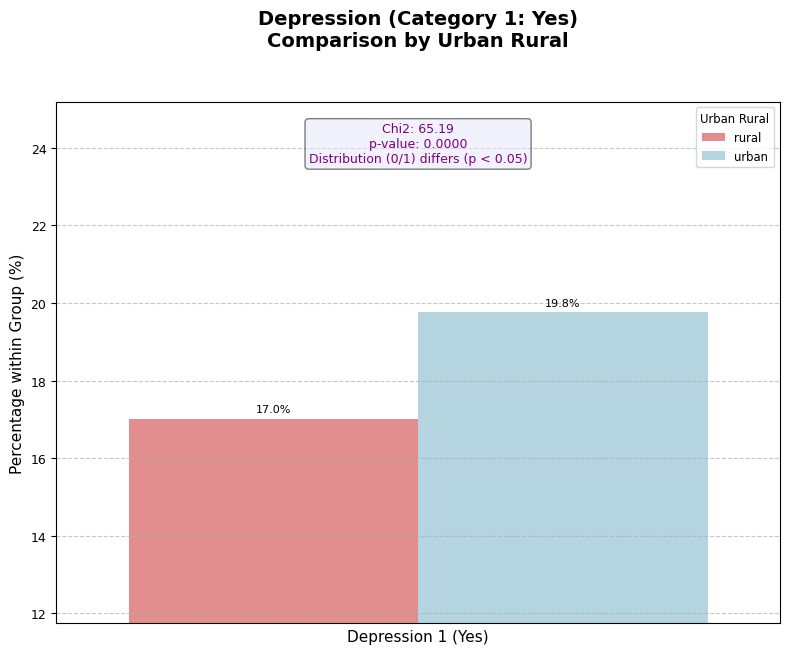

In [162]:
target_variables_analysis = ['depression'] # Changed to 'depression'
group_column = 'urban_rural' # Grouping column

# Check if grouping column exists
if group_column not in df.columns:
    print(f"Error: Grouping column '{group_column}' not found in DataFrame. Please check the column name.")
    raise SystemExit # Stop execution if grouping column is missing

# Define plot order for 'rural_urban for consistency
plot_order = ['rural', 'urban'] # rural first, then urban for plotting
palette_colors = {'rural': 'lightcoral', 'urban': 'lightblue'} # Colors

present_groups = df[group_column].unique()
# Ensure plot_order only contains groups actually present in the data, maintaining specified order
actual_plot_order = [g for g in plot_order if g in present_groups]
if len(actual_plot_order) < len(plot_order):
     print(f"Warning: Not all specified groups ({plot_order}) are present in the '{group_column}' column.")
     if not actual_plot_order: # If none of the specified order groups are present, use all unique groups
        actual_plot_order = list(present_groups)
plot_order = actual_plot_order
if not plot_order:
    print(f"Error: No valid groups found for '{group_column}' based on plot_order or unique values. Stopping.")
    raise SystemExit("No valid groups for plotting.")
print(f"Using groups for plotting: {plot_order}")


# Visualization - Loop through each target variable and create a separate plot
for var in target_variables_analysis: # This loop will run once for 'depression'
    fig, ax = plt.subplots(figsize=(8, 7)) # Create a new figure and axes for each variable

    if var not in df.columns:
        ax.text(0.5, 0.5, f"Column '{var}' not found", ha='center', va='center', fontsize=12, color='red')
        ax.set_title(f'{var.replace("_", " ").title()} (Data Missing)', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # Data preparation for the current variable
    df_copy = df.copy()
    df_copy[var] = pd.to_numeric(df_copy[var], errors='coerce')
    df_processed_var = df_copy.dropna(subset=[var, group_column]).copy()

    # --- Focus only on category 1 (Yes) for the target variable ---
    category_to_plot = [1]

    df_var_filtered = df_processed_var[df_processed_var[var].isin(category_to_plot)]

    if df_var_filtered.empty:
        ax.text(0.5, 0.5, f"No data for category '1 (Yes)'\nin variable '{var}'", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (No Data for Category 1 (Yes))', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # --- Percentage Calculation for Bar Plot (for category 1 only) ---
    counts_category_1_df = df_var_filtered[df_var_filtered[var] == 1].groupby(group_column).size().reset_index(name='counts_cat1')
    total_counts_all_categories_df = df_processed_var[df_processed_var[var].isin([0,1])].groupby(group_column).size().reset_index(name='total_counts')

    if total_counts_all_categories_df.empty:
        ax.text(0.5, 0.5, f"No group data for '{group_column}'\nin '{var}' for percentage base.", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (No Group Data for Base %)', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    percentage_df_cat1 = pd.merge(counts_category_1_df, total_counts_all_categories_df, on=group_column, how='right')
    percentage_df_cat1['counts_cat1'] = percentage_df_cat1['counts_cat1'].fillna(0)
    percentage_df_cat1['percentage'] = np.where(percentage_df_cat1['total_counts'] > 0,
                                           (percentage_df_cat1['counts_cat1'] / percentage_df_cat1['total_counts']) * 100,
                                           0)
    percentage_df_cat1[var] = 1

    # print(f"Percentage data for plotting '{var}':\n{percentage_df_cat1}") # Optional: for debugging

    if percentage_df_cat1.empty or percentage_df_cat1['percentage'].isnull().all():
        ax.text(0.5, 0.5, f"Could not calculate percentages for '{var}' category '1 (Yes)'.", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (Percentage Calc Failed for 1 (Yes))', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    # --- Chi-squared Test (using all categories 0 and 1 for the test) ---
    contingency_table_full = pd.crosstab(df_processed_var[df_processed_var[var].isin([0,1])][var],
                                         df_processed_var[df_processed_var[var].isin([0,1])][group_column])
    chi2_stat_text = "Chi2: N/A"
    p_value_text = "p-value: N/A"
    conclusion_text = "Relationship: Undetermined"

    if contingency_table_full.shape[0] >= 2 and contingency_table_full.shape[1] >= 2 and contingency_table_full.sum().sum() > 0:
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table_full)
            chi2_stat_text = f"Chi2: {chi2:.2f}"
            p_value_text = f"p-value: {p:.4f}"
            if p < 0.05:
                conclusion_text = "Distribution (0/1) differs (p < 0.05)"
            else:
                conclusion_text = "No sig. diff. in distribution (p >= 0.05)"
        except ValueError as e:
            print(f"Chi-squared test could not be performed for {var}: {e}")
            conclusion_text = "Chi2 test error"
    else:
        conclusion_text = "Not enough data for Chi2 test (0/1)"

    # --- Plotting ---
    percentage_df_to_plot = percentage_df_cat1[percentage_df_cat1[group_column].isin(plot_order)]

    if percentage_df_to_plot.empty:
        ax.text(0.5, 0.5, f"No data to plot for groups {plot_order}\n in variable '{var}'.", ha='center', va='center', fontsize=10, color='orange')
        ax.set_title(f'{var.replace("_", " ").title()} (No Data to Plot)', fontsize=14)
        ax.axis('off')
        plt.show()
        continue

    sns.barplot(data=percentage_df_to_plot, x=var, y='percentage', hue=group_column, ax=ax,
                  palette=palette_colors,
                  order=category_to_plot,
                  hue_order=plot_order)

    plot_title = f'{var.replace("_", " ").title()} (Category 1: Yes)\nComparison by {group_column.replace("_"," ").title()}'
    ax.set_title(plot_title, fontsize=14, weight='bold', pad=40)

    ax.set_xlabel(f"{var.replace('_', ' ').title()} 1 (Yes)", fontsize=11)
    ax.set_xticks([])

    ax.set_ylabel('Percentage within Group (%)', fontsize=11)
    ax.tick_params(axis='y', labelsize=9)

    # Adjust Y-axis to emphasize differences, based on data range
    if not percentage_df_to_plot.empty and not percentage_df_to_plot['percentage'].isnull().all():
        min_val = percentage_df_to_plot['percentage'].min()
        max_val = percentage_df_to_plot['percentage'].max()

        # Ensure min_val and max_val are not NaN before calculations
        if pd.notna(min_val) and pd.notna(max_val):
            y_range = max_val - min_val
            padding_bottom = y_range * 0.1 if y_range > 0 else 2 # 10% or fixed padding
            padding_top = y_range * 0.15 if y_range > 0 else 5 # 15% or fixed padding for annotations

            y_lower_bound = max(0, min_val - padding_bottom)
            y_upper_bound = min(100, max_val + padding_top) # Cap at 100 if padding makes it exceed

            # If min and max are very close, expand the range a bit more
            if y_upper_bound - y_lower_bound < 10 and y_lower_bound > 0: # e.g. if range is less than 10%
                 y_lower_bound = max(0, y_lower_bound - 5)
                 y_upper_bound = min(100, y_upper_bound + 5)
            elif y_upper_bound - y_lower_bound < 10 and y_lower_bound == 0:
                 y_upper_bound = min(100, y_upper_bound + 10)


            ax.set_ylim(y_lower_bound, y_upper_bound if y_upper_bound > y_lower_bound else y_lower_bound + 10) # Ensure upper > lower
        else:
            ax.set_ylim(0, 55) # Fallback if min/max are NaN
    else:
        ax.set_ylim(0, 55) # Fallback if no percentage data


    for p_patch in ax.patches:
        if p_patch.get_height() > 0:
            ax.annotate(f"{p_patch.get_height():.1f}%",
                          (p_patch.get_x() + p_patch.get_width() / 2., p_patch.get_height()),
                          ha='center', va='bottom',
                          xytext=(0, 3),
                          textcoords='offset points',
                          fontsize=8, color='black')

    stats_text = f"{chi2_stat_text}\n{p_value_text}\n{conclusion_text}"
    ax.text(0.5, 0.96, stats_text, ha='center', va='top', transform=ax.transAxes,
            fontsize=9, color='purple', bbox=dict(boxstyle='round,pad=0.3', fc='lavender', alpha=0.5))

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        legend_title = group_column.replace("_"," ").title()
        ax.legend(handles=handles, labels=labels, title=legend_title, loc='upper right', fontsize='small', title_fontsize='small')
    elif ax.get_legend() is not None:
        ax.get_legend().remove()

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()
